In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set display options
pd.set_option('display.max_columns', None)

In [3]:
train = pd.read_csv("../input/train.csv")
train.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


Utilize 17 clinical features for predicting survival state of patients with liver cirrhosis. The survival states include 0 = D (death), 1 = C (censored), 2 = CL (censored due to liver transplantation).

In [4]:
train.isna().sum()

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64

In [5]:
categorical_columns = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Stage']
numerical_columns = ['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']
target = 'Status'

In [6]:
train.nunique()

id               7905
N_Days            461
Drug                2
Age               391
Sex                 2
Ascites             2
Hepatomegaly        2
Spiders             2
Edema               3
Bilirubin         111
Cholesterol       226
Albumin           160
Copper            171
Alk_Phos          364
SGOT              206
Tryglicerides     154
Platelets         227
Prothrombin        49
Stage               4
Status              3
dtype: int64

In [7]:
train.Status.value_counts()

Status
C     4965
D     2665
CL     275
Name: count, dtype: int64

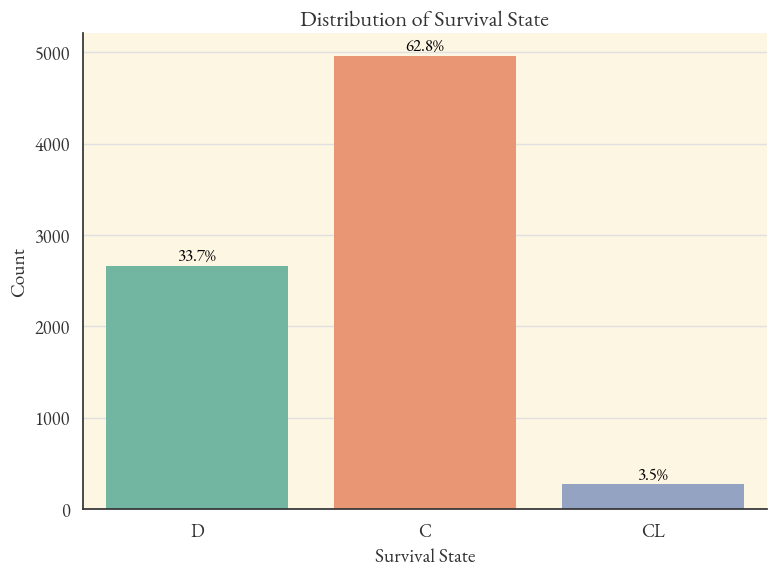

In [8]:
from plot import plot_count_with_percentages

plot_count_with_percentages(train, target, title="Distribution of Survival State", xlabel="Survival State", ylabel="Count")

In [9]:
import analyze

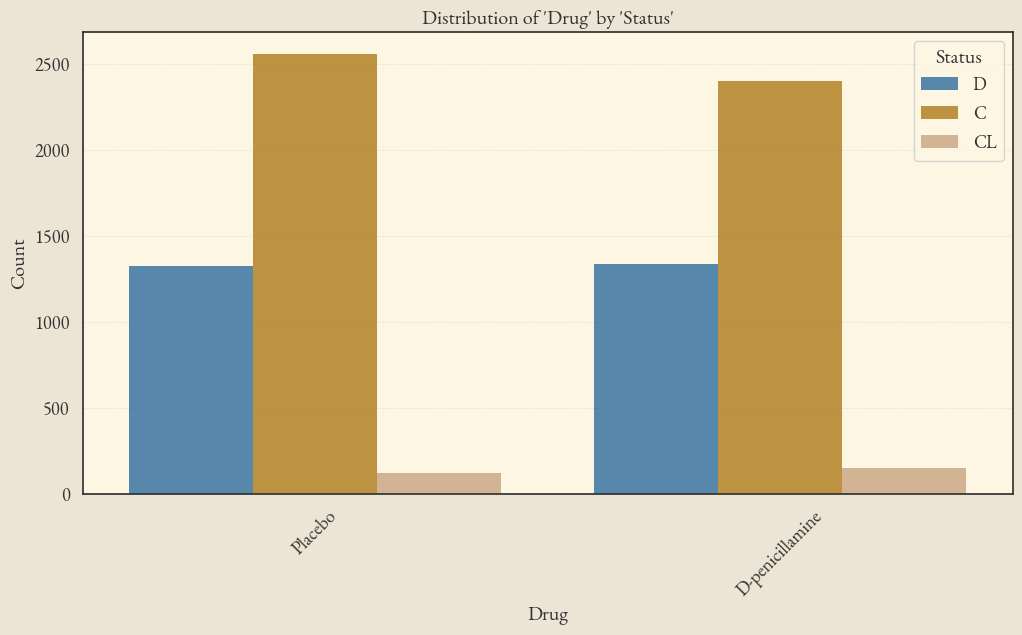

,Total Count,Total Percentage,C of Total (%),CL of Total (%),D of Total (%),C within Drug (%),CL within Drug (%),D within Drug (%)
Drug,,,,,,,,
Placebo,4010,50.727388,32.384567,1.568627,16.774194,63.840399,3.092269,33.067332
D-penicillamine,3895,49.272612,30.423782,1.910183,16.938646,61.745828,3.876765,34.377407


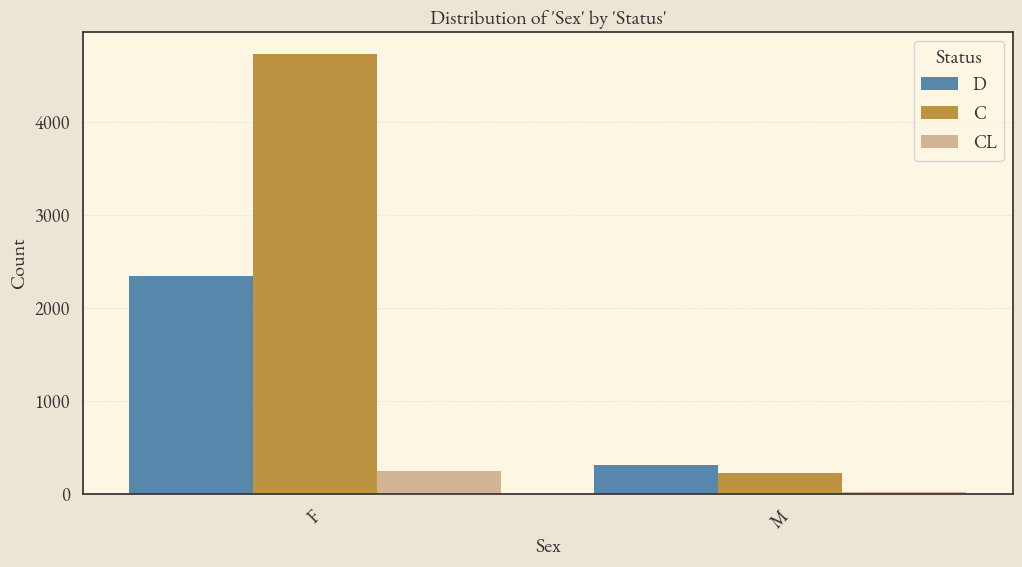

,Total Count,Total Percentage,C of Total (%),CL of Total (%),D of Total (%),C within Sex (%),CL within Sex (%),D within Sex (%)
Sex,,,,,,,,
F,7336,92.802024,59.898798,3.175206,29.72802,64.544711,3.421483,32.033806
M,569,7.197976,2.909551,0.303605,3.98482,40.421793,4.217926,55.360281


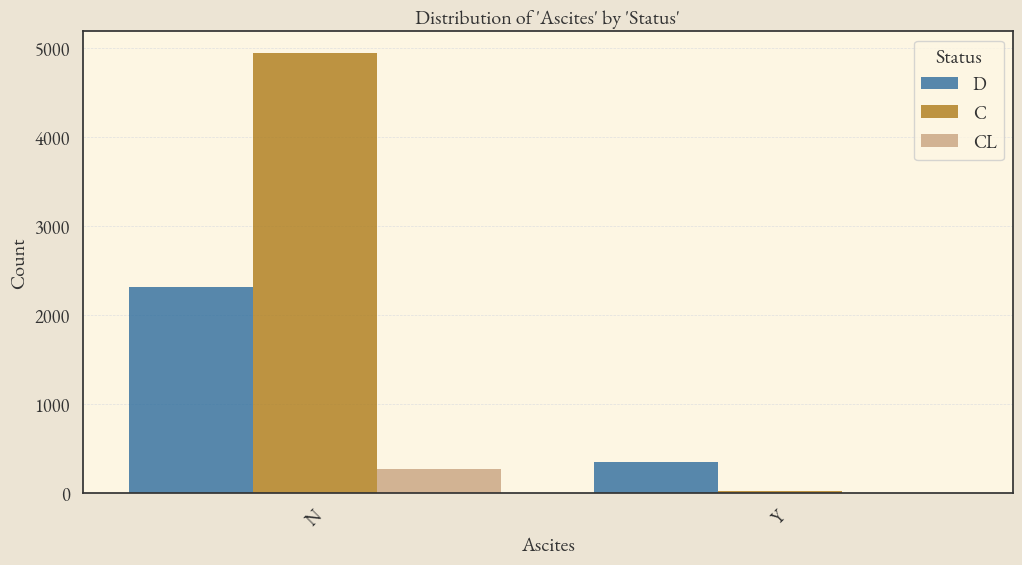

,Total Count,Total Percentage,C of Total (%),CL of Total (%),D of Total (%),C within Ascites (%),CL within Ascites (%),D within Ascites (%)
Ascites,,,,,,,,
N,7525,95.192916,62.492094,3.402910,29.297913,65.647841,3.574751,30.777409
Y,380,4.807084,0.316256,0.075901,4.414927,6.578947,1.578947,91.842105


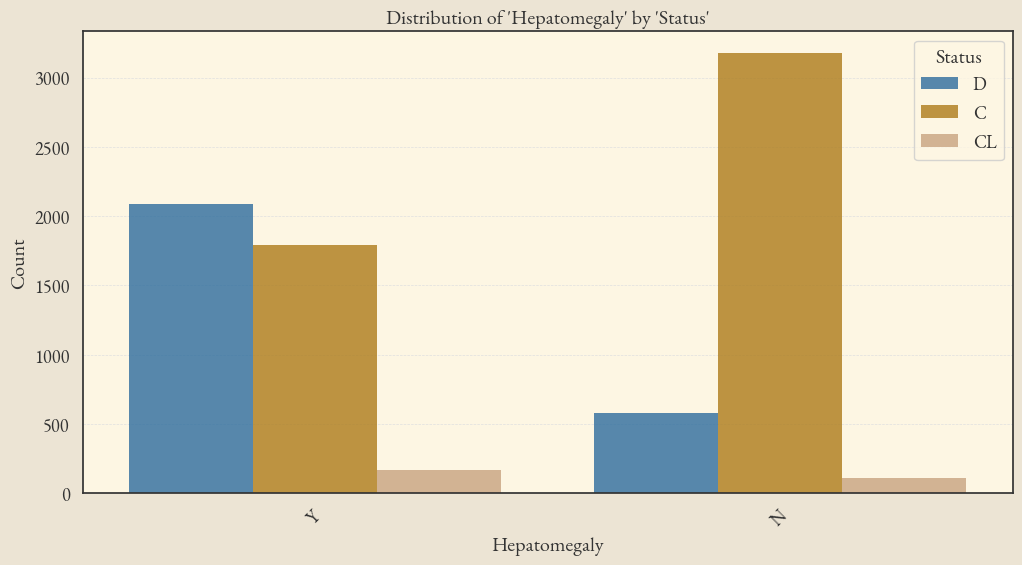

,Total Count,Total Percentage,C of Total (%),CL of Total (%),D of Total (%),C within Hepatomegaly (%),CL within Hepatomegaly (%),D within Hepatomegaly (%)
Hepatomegaly,,,,,,,,
Y,4042,51.132195,22.656546,2.099937,26.375712,44.309748,4.106878,51.583375
N,3863,48.867805,40.151803,1.378874,7.337128,82.164121,2.821641,15.014238


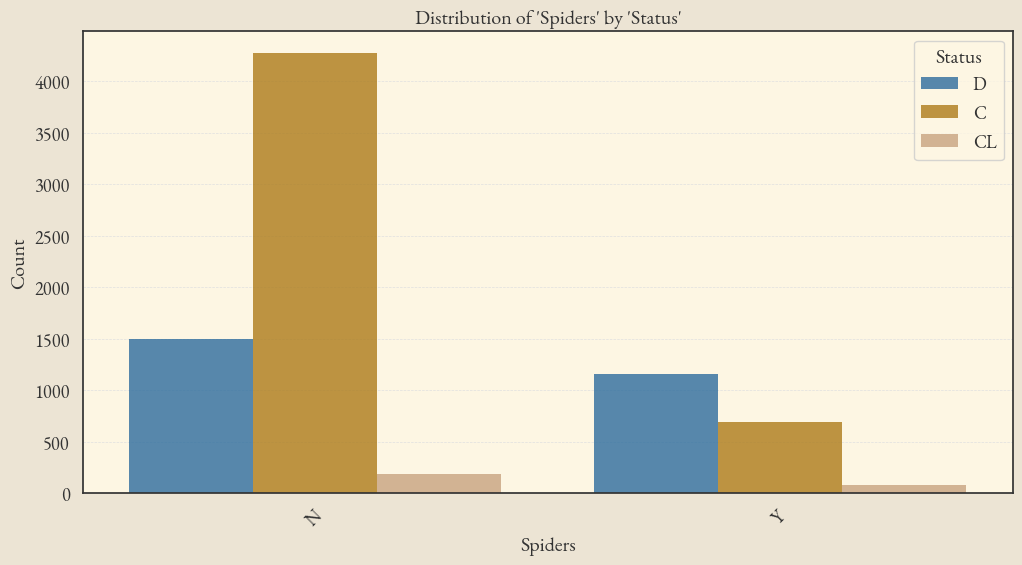

,Total Count,Total Percentage,C of Total (%),CL of Total (%),D of Total (%),C within Spiders (%),CL within Spiders (%),D within Spiders (%)
Spiders,,,,,,,,
N,5966,75.471221,54.041746,2.441493,18.987982,71.605766,3.234998,25.159236
Y,1939,24.528779,8.766603,1.037318,14.724858,35.740072,4.228984,60.030944


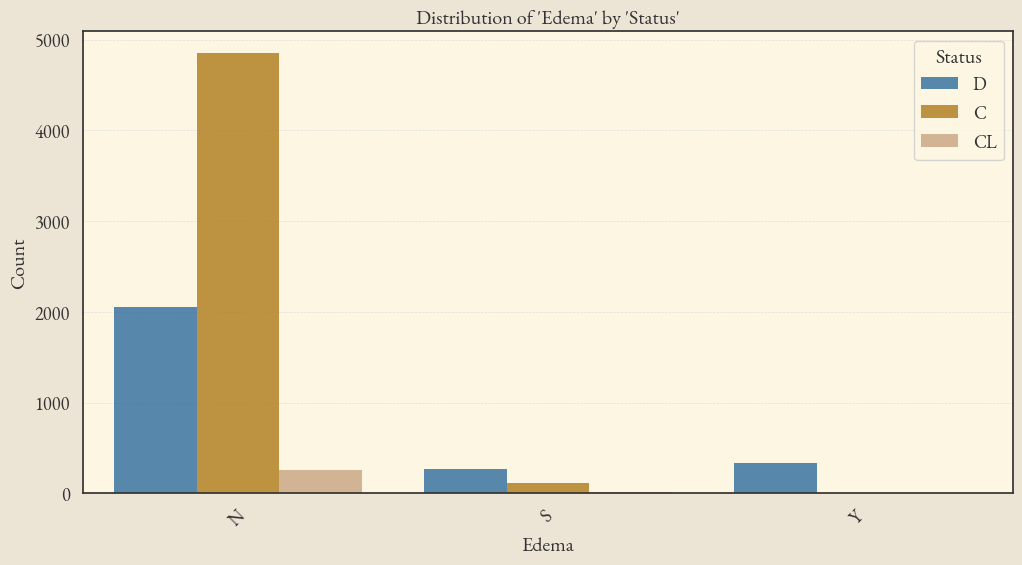

,Total Count,Total Percentage,C of Total (%),CL of Total (%),D of Total (%),C within Edema (%),CL within Edema (%),D within Edema (%)
Edema,,,,,,,,
N,7161,90.588235,61.315623,3.251107,26.021505,67.686077,3.588884,28.725038
S,399,5.047438,1.391524,0.202404,3.453510,27.568922,4.010025,68.421053
Y,345,4.364326,0.101202,0.025300,4.237824,2.318841,0.579710,97.101449


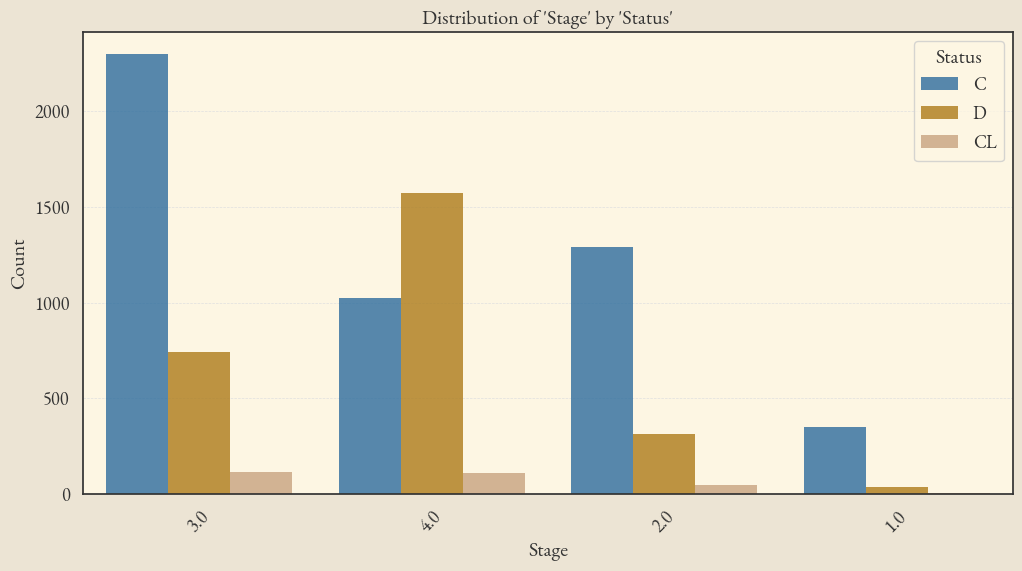

,Total Count,Total Percentage,C of Total (%),CL of Total (%),D of Total (%),C within Stage (%),CL within Stage (%),D within Stage (%)
Stage,,,,,,,,
3.0,3153,39.886148,29.070209,1.429475,9.386464,72.882969,3.583888,23.533143
4.0,2703,34.193548,12.941176,1.366224,19.886148,37.846837,3.995560,58.157603
2.0,1652,20.898166,16.356736,0.594560,3.946869,78.268765,2.845036,18.886199
1.0,397,5.022138,4.440228,0.088552,0.493359,88.413098,1.763224,9.823678


In [10]:
for column in categorical_columns:
    summary = analyze.categorical_feature(df=train, feature=column, target=target)
    display(summary)

d:\suraj\Data Science\Kaggle\S3E26 Prediction of Cirrhosis Outcomes\notebooks\analyze.py:231: UserWarning: The palette list has more values (391) than needed (3), which may not be intended.
  sns.boxplot(


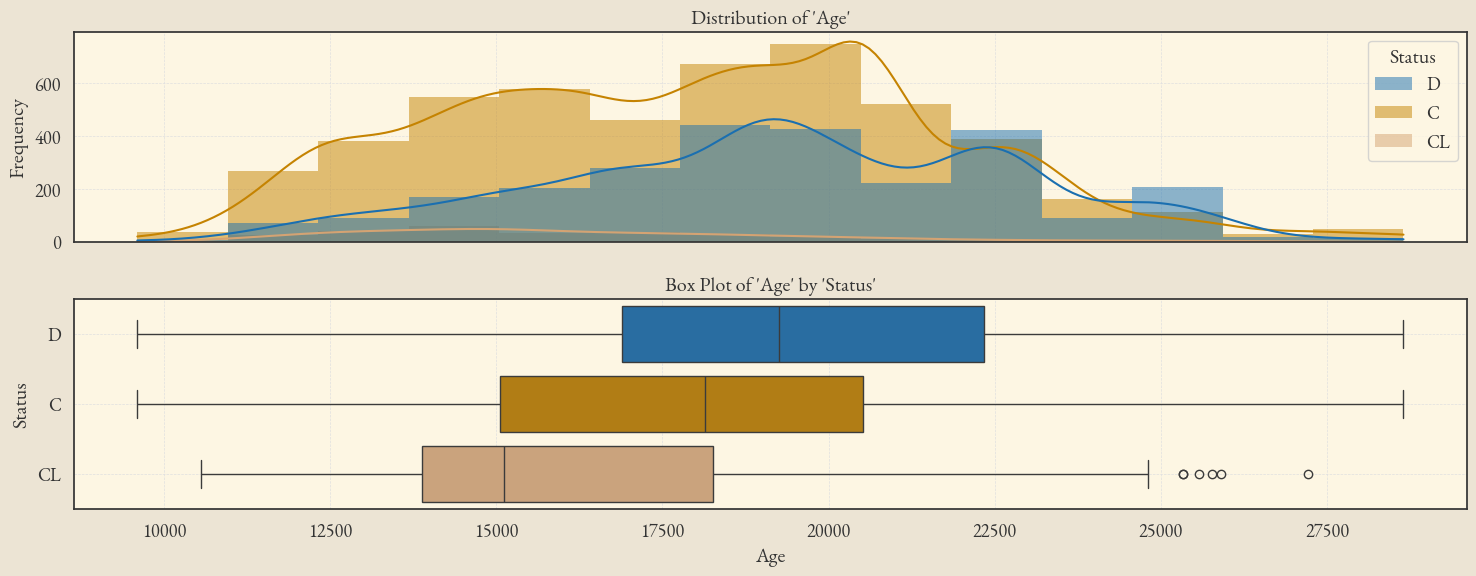

,count,mean,std,min,25%,50%,75%,max
Age_Overall,7905.0,18373.14649,3679.958739,9598.0,15574.0,18713.0,20684.0,28650.0
Age_Lower_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age_Upper_Outliers,36.0,28650.00000,0.000000,28650.0,28650.0,28650.0,28650.0,28650.0


,Total Outliers,Outlier Percentage (%),Lower Outliers,Lower Outliers Percentage (%),Upper Outliers,Upper Outliers Percentage (%)
0,36,0.455408,0,0.0,36,0.455408


d:\suraj\Data Science\Kaggle\S3E26 Prediction of Cirrhosis Outcomes\notebooks\analyze.py:231: UserWarning: The palette list has more values (111) than needed (3), which may not be intended.
  sns.boxplot(


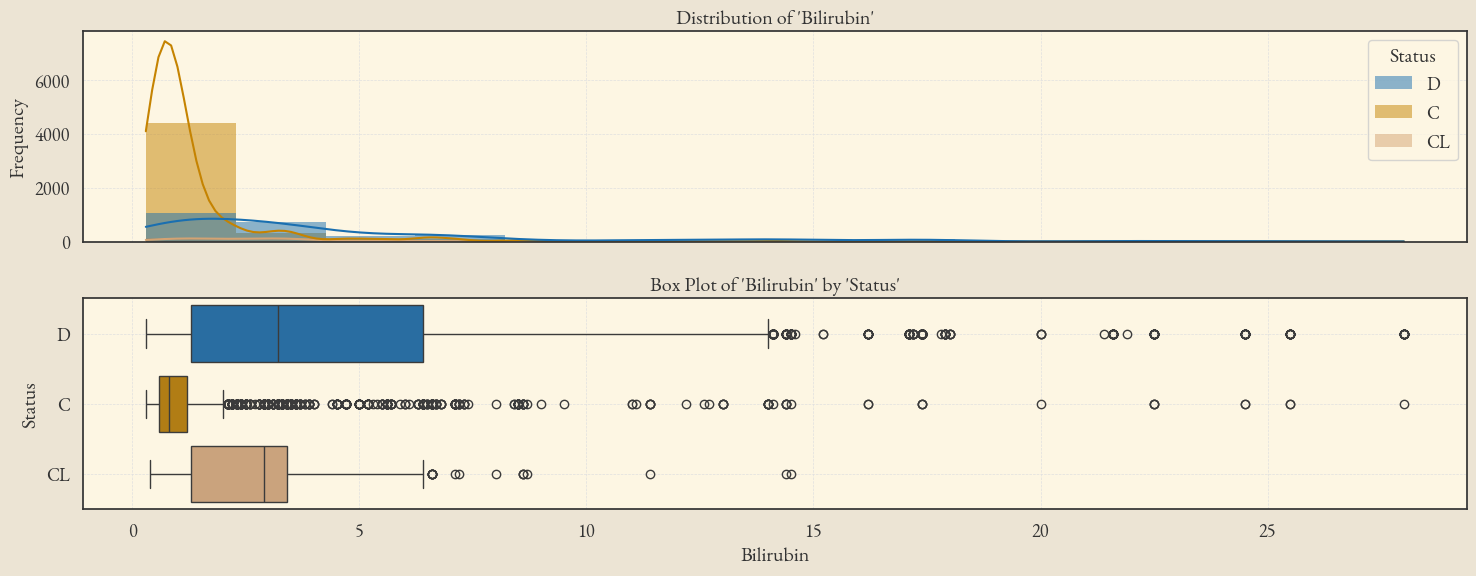

,count,mean,std,min,25%,50%,75%,max
Bilirubin_Overall,7905.0,2.594485,3.812960,0.3,0.7,1.1,3.0,28.0
Bilirubin_Lower_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bilirubin_Upper_Outliers,789.0,12.038276,5.556535,6.5,7.1,11.0,14.5,28.0


,Total Outliers,Outlier Percentage (%),Lower Outliers,Lower Outliers Percentage (%),Upper Outliers,Upper Outliers Percentage (%)
0,789,9.981025,0,0.0,789,9.981025


d:\suraj\Data Science\Kaggle\S3E26 Prediction of Cirrhosis Outcomes\notebooks\analyze.py:231: UserWarning: The palette list has more values (226) than needed (3), which may not be intended.
  sns.boxplot(


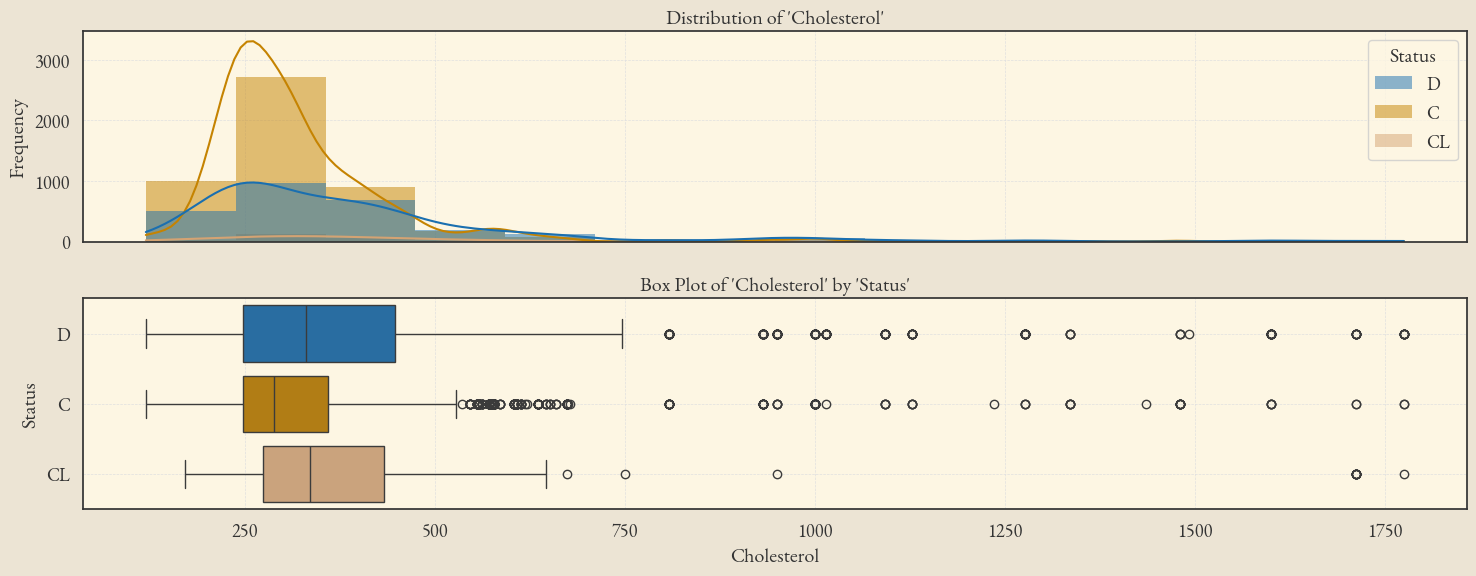

,count,mean,std,min,25%,50%,75%,max
Cholesterol_Overall,7905.0,350.561923,195.379344,120.0,248.0,298.0,390.0,1775.0
Cholesterol_Lower_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cholesterol_Upper_Outliers,502.0,933.840637,337.774131,604.0,652.0,932.0,1015.0,1775.0


,Total Outliers,Outlier Percentage (%),Lower Outliers,Lower Outliers Percentage (%),Upper Outliers,Upper Outliers Percentage (%)
0,502,6.350411,0,0.0,502,6.350411


d:\suraj\Data Science\Kaggle\S3E26 Prediction of Cirrhosis Outcomes\notebooks\analyze.py:231: UserWarning: The palette list has more values (160) than needed (3), which may not be intended.
  sns.boxplot(


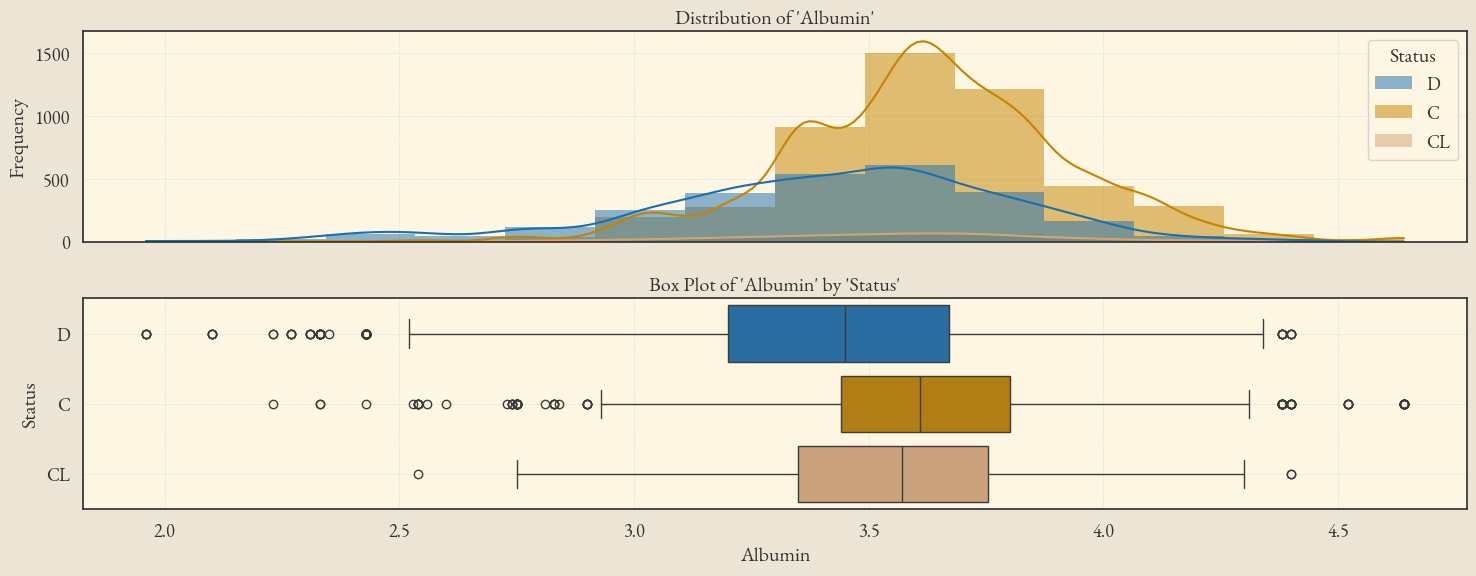

,count,mean,std,min,25%,50%,75%,max
Albumin_Overall,7905.0,3.548323,0.346171,1.96,3.35,3.58,3.77,4.64
Albumin_Lower_Outliers,153.0,2.441503,0.137165,1.96,2.43,2.43,2.54,2.64
Albumin_Upper_Outliers,25.0,4.616000,0.048990,4.52,4.64,4.64,4.64,4.64


,Total Outliers,Outlier Percentage (%),Lower Outliers,Lower Outliers Percentage (%),Upper Outliers,Upper Outliers Percentage (%)
0,178,2.251739,153,1.935484,25,0.316256


d:\suraj\Data Science\Kaggle\S3E26 Prediction of Cirrhosis Outcomes\notebooks\analyze.py:231: UserWarning: The palette list has more values (171) than needed (3), which may not be intended.
  sns.boxplot(


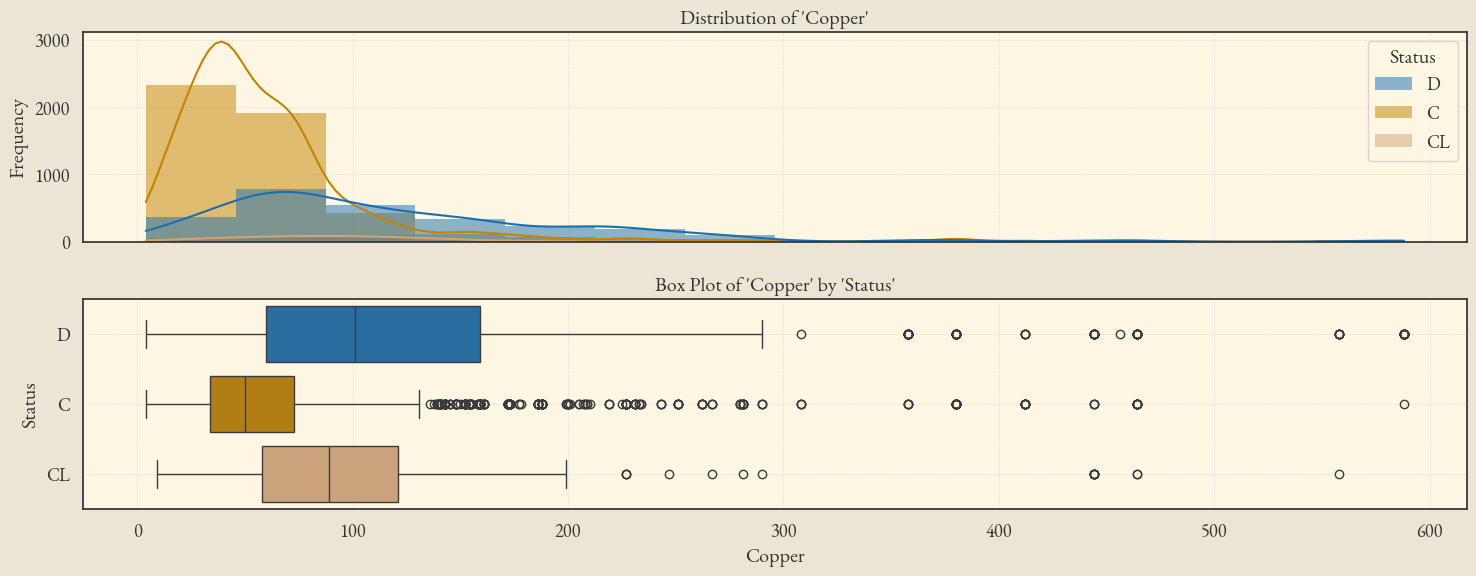

,count,mean,std,min,25%,50%,75%,max
Copper_Overall,7905.0,83.902846,75.899266,4.0,39.0,63.0,102.0,588.0
Copper_Lower_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Copper_Upper_Outliers,655.0,281.251908,96.006924,199.0,219.0,243.0,290.0,588.0


,Total Outliers,Outlier Percentage (%),Lower Outliers,Lower Outliers Percentage (%),Upper Outliers,Upper Outliers Percentage (%)
0,655,8.285895,0,0.0,655,8.285895


d:\suraj\Data Science\Kaggle\S3E26 Prediction of Cirrhosis Outcomes\notebooks\analyze.py:231: UserWarning: The palette list has more values (364) than needed (3), which may not be intended.
  sns.boxplot(


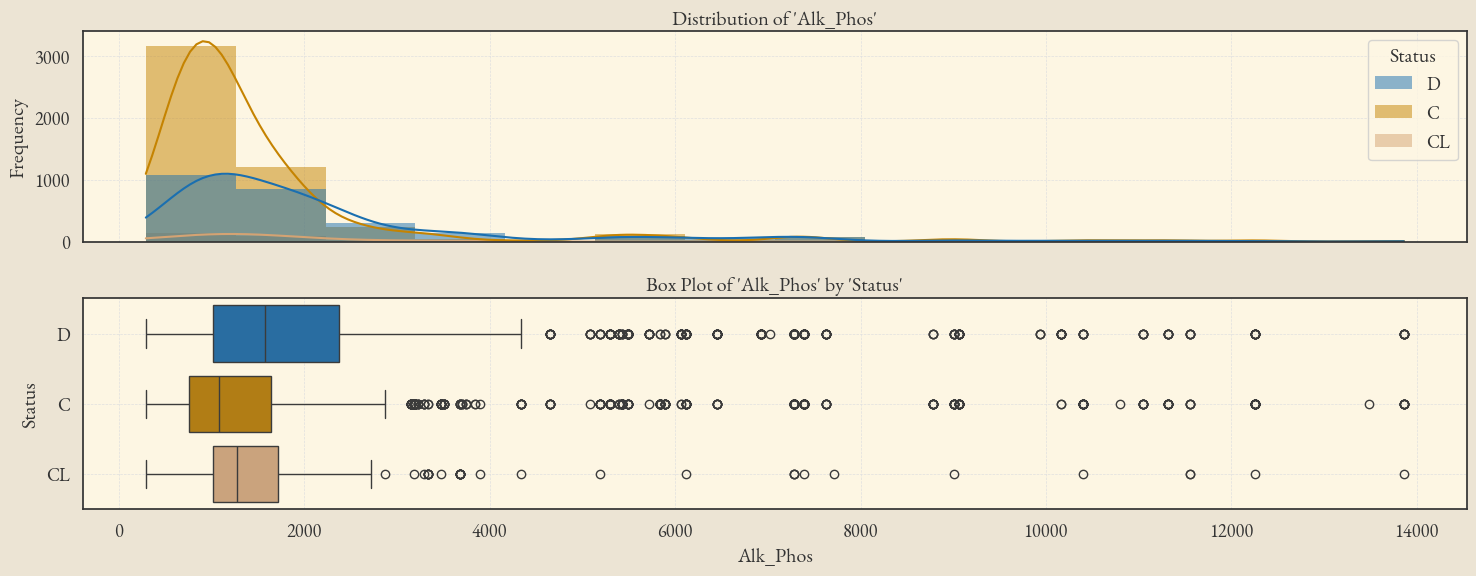

,count,mean,std,min,25%,50%,75%,max
Alk_Phos_Overall,7905.0,1816.745250,1903.750657,289.0,834.0,1181.0,1857.0,13862.4
Alk_Phos_Lower_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alk_Phos_Upper_Outliers,792.0,6671.866414,2560.700758,3472.0,5184.0,6064.8,7394.8,13862.4


,Total Outliers,Outlier Percentage (%),Lower Outliers,Lower Outliers Percentage (%),Upper Outliers,Upper Outliers Percentage (%)
0,792,10.018975,0,0.0,792,10.018975


d:\suraj\Data Science\Kaggle\S3E26 Prediction of Cirrhosis Outcomes\notebooks\analyze.py:231: UserWarning: The palette list has more values (206) than needed (3), which may not be intended.
  sns.boxplot(


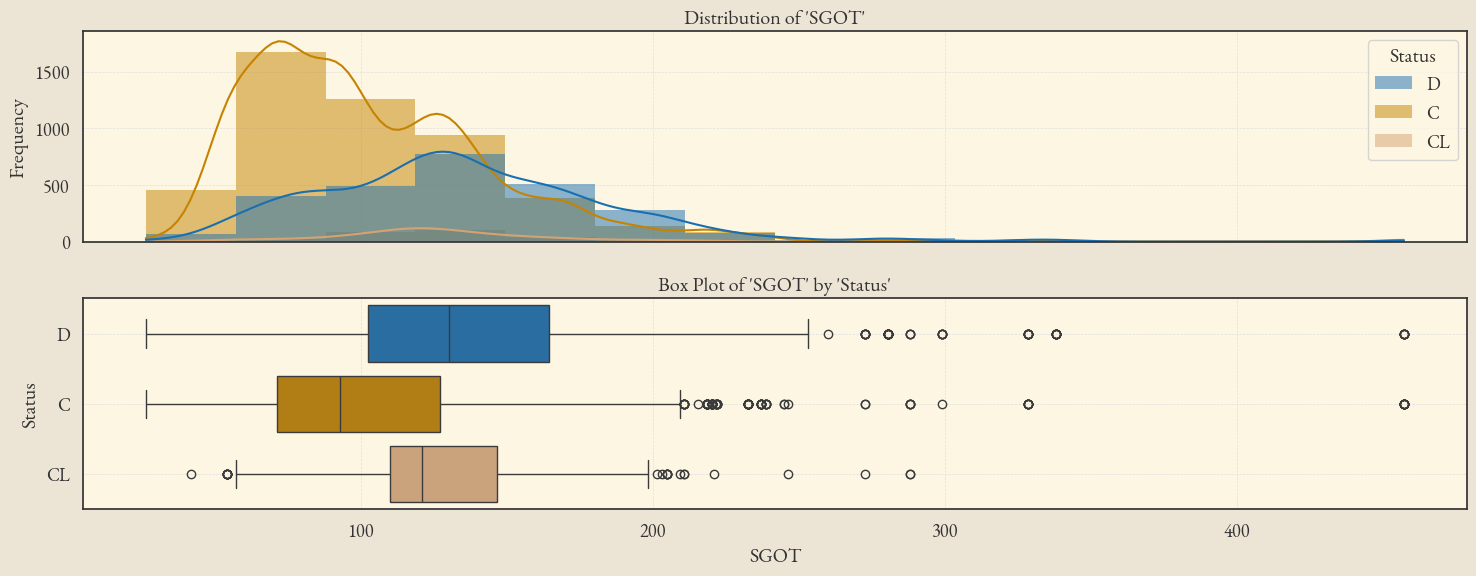

,count,mean,std,min,25%,50%,75%,max
SGOT_Overall,7905.0,114.604602,48.790945,26.35,75.95,108.5,137.95,457.25
SGOT_Lower_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SGOT_Upper_Outliers,146.0,291.717466,69.215763,232.50,238.70,272.8,328.60,457.25


,Total Outliers,Outlier Percentage (%),Lower Outliers,Lower Outliers Percentage (%),Upper Outliers,Upper Outliers Percentage (%)
0,146,1.846932,0,0.0,146,1.846932


d:\suraj\Data Science\Kaggle\S3E26 Prediction of Cirrhosis Outcomes\notebooks\analyze.py:231: UserWarning: The palette list has more values (154) than needed (3), which may not be intended.
  sns.boxplot(


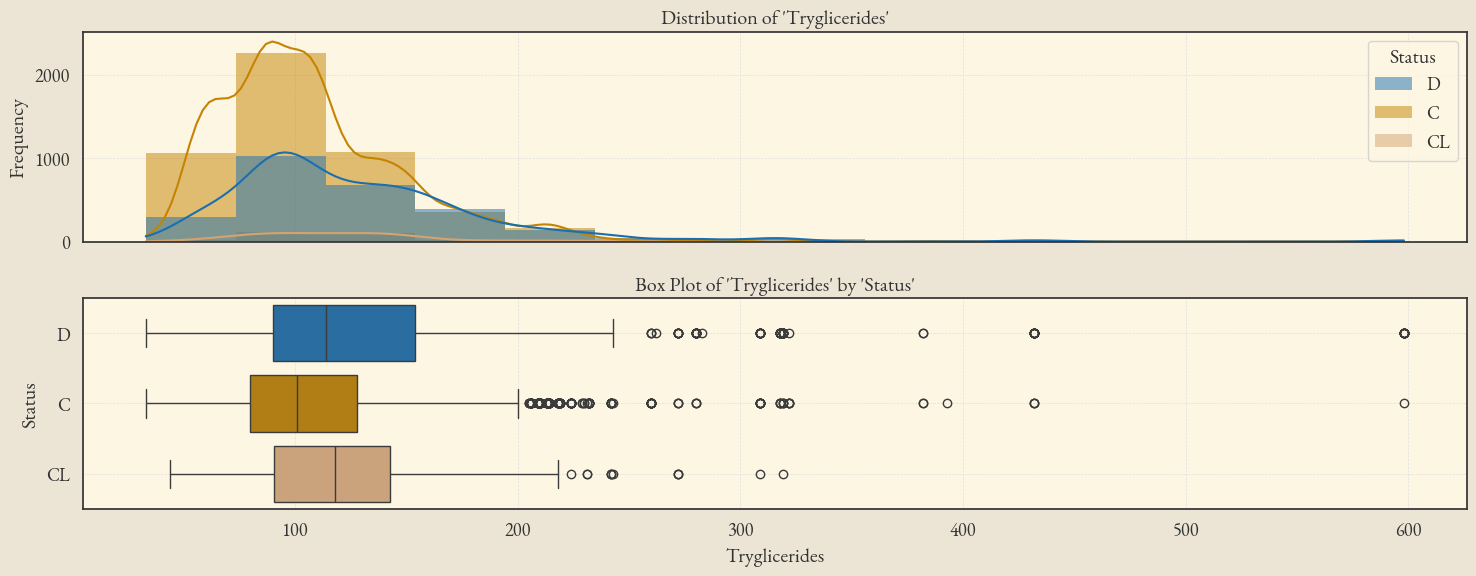

,count,mean,std,min,25%,50%,75%,max
Tryglicerides_Overall,7905.0,115.340164,52.530402,33.0,84.0,104.0,139.0,598.0
Tryglicerides_Lower_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tryglicerides_Upper_Outliers,267.0,290.861423,88.179965,224.0,232.0,260.0,318.0,598.0


,Total Outliers,Outlier Percentage (%),Lower Outliers,Lower Outliers Percentage (%),Upper Outliers,Upper Outliers Percentage (%)
0,267,3.377609,0,0.0,267,3.377609


d:\suraj\Data Science\Kaggle\S3E26 Prediction of Cirrhosis Outcomes\notebooks\analyze.py:231: UserWarning: The palette list has more values (227) than needed (3), which may not be intended.
  sns.boxplot(


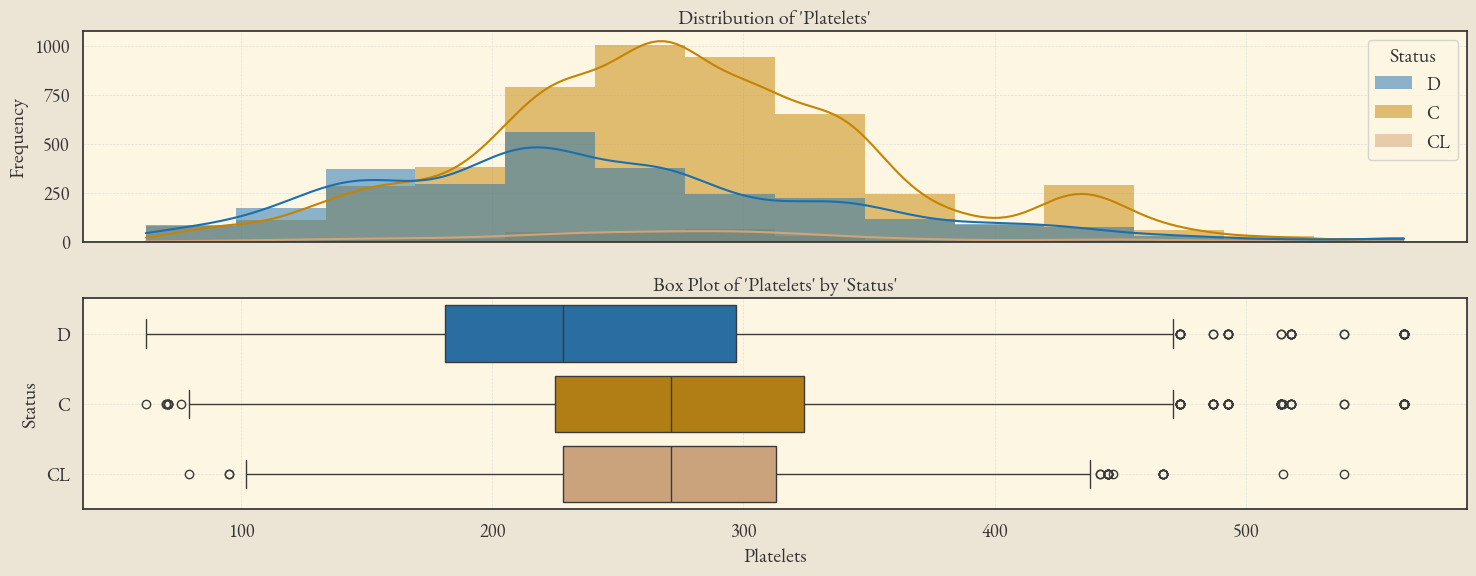

,count,mean,std,min,25%,50%,75%,max
Platelets_Overall,7905.0,265.228969,87.465579,62.0,211.0,265.0,316.0,563.0
Platelets_Lower_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Platelets_Upper_Outliers,114.0,519.614035,33.680043,474.0,493.0,514.5,563.0,563.0


,Total Outliers,Outlier Percentage (%),Lower Outliers,Lower Outliers Percentage (%),Upper Outliers,Upper Outliers Percentage (%)
0,114,1.442125,0,0.0,114,1.442125


d:\suraj\Data Science\Kaggle\S3E26 Prediction of Cirrhosis Outcomes\notebooks\analyze.py:231: UserWarning: The palette list has more values (49) than needed (3), which may not be intended.
  sns.boxplot(


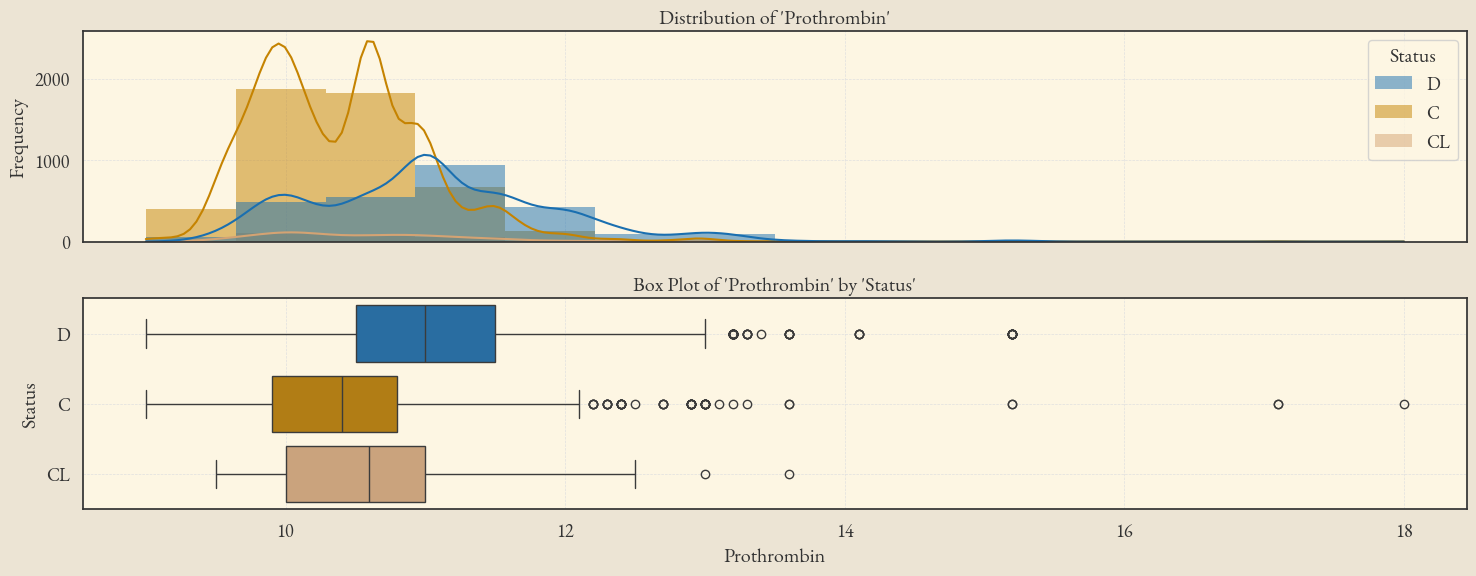

,count,mean,std,min,25%,50%,75%,max
Prothrombin_Overall,7905.0,10.629462,0.781735,9.0,10.0,10.6,11.0,18.0
Prothrombin_Lower_Outliers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Prothrombin_Upper_Outliers,173.0,13.261850,0.830131,12.6,12.9,13.0,13.2,18.0


,Total Outliers,Outlier Percentage (%),Lower Outliers,Lower Outliers Percentage (%),Upper Outliers,Upper Outliers Percentage (%)
0,173,2.188488,0,0.0,173,2.188488


In [11]:
for col in numerical_columns:
    outliers, summary = analyze.numerical_feature(df=train, feature=col, target=target)
    display(summary)
    display(outliers)